In [7]:
import numpy as np
from vpsto.vpsto import VPSTO, VPSTOOptions, VPSTOSolution
import matplotlib.pyplot as plt

In [8]:
x_init = 0
y_init = 0

x_lim = [0, 50]
y_lim = [-10, 10]

obs_x=[10, 30, 20]
obs_y=[0, 5, -5]

obs_a = 2.5
obs_b = 0.5


In [9]:
def create_points(x_init, y_init, x_lim, y_lim, mesh_size):
    x_min, x_max = x_lim
    y_min, y_max = y_lim
    
    x_pt = np.linspace(x_min + 2, x_max, mesh_size)
    y_pt = np.linspace(y_min, y_max, mesh_size)
    
    points_x = []
    points_y = []

    for x in x_pt:
        points_x.append(x)
        points_y.append(0)

    for x in x_pt:
        for y in y_pt:
            points_x.append(x)
            points_y.append(y)
            
    return np.array(points_x), np.array(points_y)
    
    

In [10]:
points_x, points_y = create_points(x_init, y_init, x_lim, y_lim, 20)

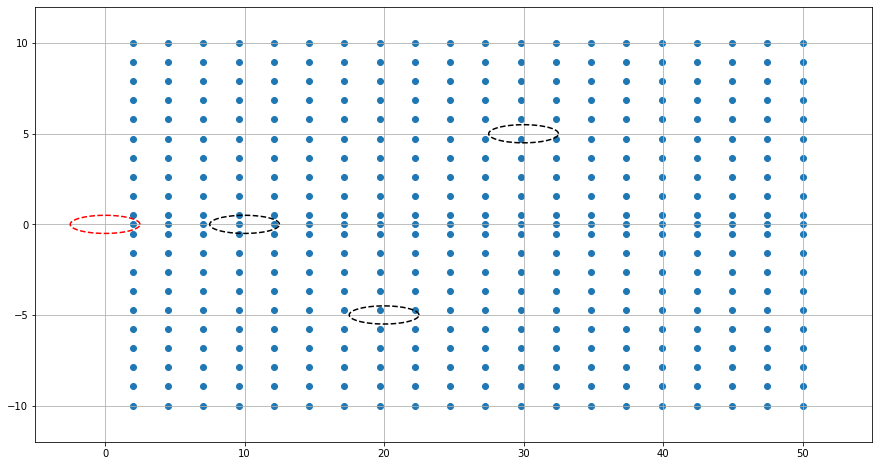

In [11]:
plt.figure(figsize=(15, 8))
plt.scatter(points_x, points_y)

t = np.linspace(0, 2*np.pi, 100)
for i in range(len(obs_x)):
  plt.plot(obs_x[i]+obs_a*np.cos(t) , obs_y[i]+obs_b*np.sin(t) , "--", color="black")

plt.plot(x_init+obs_a*np.cos(t) , y_init+obs_b*np.sin(t) , "--", color="red")

plt.xlim([-5, 55])
plt.ylim([-12, 12])
plt.grid()
plt.show()

In [12]:
points_x.shape

(420,)

In [13]:
points_y.shape

(420,)

In [14]:
def compute_cumutative_collision_cost(x, y, obs_x, obs_y, obs_a, obs_b):
    obs_x = np.array(obs_x).reshape(len(obs_x), 1)
    obs_y = np.array(obs_y).reshape(len(obs_y), 1)

    # cost_collision = -((x - obs_x[:, np.newaxis])/((2*obs_a)))**2 - ((y - obs_y[:, np.newaxis])/(obs_b))**2 + 1
    cost_collision = np.maximum(np.zeros(x.shape), -((x - obs_x[:, np.newaxis])/((2*obs_a+0.5)))**2 - ((y - obs_y[:, np.newaxis])/(2*obs_b+0.5))**2 + 1) 

    # print(cost_collision.shape)
    cost_collision_combined = np.sum(cost_collision, axis=0)
    # print(cost_collision_combined.shape)
    
    final_cost_collision = cost_collision_combined[0]    

    return final_cost_collision

In [15]:
final_cost_collision = compute_cumutative_collision_cost(points_x, 
                                                         points_y,
                                                         obs_x,
                                                         obs_y,
                                                         obs_a,
                                                         obs_b)

In [17]:
final_cost_collision

array([0.        , 0.00954648, 0.71282709, 0.99413933, 0.85348321,
       0.29085873, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.58971228,
       0.58971228, 0.        , 0.        , 0.        , 0.     